## ETL (Extract - Transform - Load)

## Removing Duplicates

In [9]:
# We remove the duplicates and create a new dataframe adv_updated with no duplicates

adv_updated = adventure_works.drop_duplicates(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')

Let's check if the results for *Amanda Cook* are the expected ones.

In [10]:
print("Index 252! The results are the expected ones")
print("--------------------------------------------")
adv_updated[(adv_updated['FirstName'] == 'Amanda') & (adv_updated['LastName'] == 'Cook')]

Index 252! The results are the expected ones
--------------------------------------------


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
252,11279,Amanda,Cook,9187 Vista Del Sol,Everett,Washington,United States,98201,252-555-0177,1963-09-12,Partial College,Professional,F,M,1,1,0,0,86138


In [11]:
# We check that the duplicates have been removed
print("Remaning Duplicates")

adv_updated[adv_updated.duplicated(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')].sort_values(axis=0, by='FirstName')

Remaning Duplicates


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome


In [12]:
# print the shape of the updated dataframe
adv_updated.shape

(16404, 19)

The new dataframe adv_updated contains now **16404** rows. We see that there are no remaining duplicates for the specified criterias. Let's have a look at the *aw_avmonthspend* dataframe.

In [13]:
# Print the first elements of aw_avmonthspend
aw_avmonthspend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [14]:
# Get more infos about aw_avmonthspend
aw_avmonthspend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID       16519 non-null int64
AveMonthSpend    16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


The dataframe *aw_avmonthspend* doesn't contain null values. What about the duplicates?

In [15]:
# Remove duplicated rows. We identify duplicated rows as rows with identical value for the CustomerID column

aw_avupdated = aw_avmonthspend.drop_duplicates(subset=['CustomerID'], keep='last')

# Check to see if the duplicates have been removed
aw_avupdated.duplicated(subset=['CustomerID']).value_counts()

False    16404
dtype: int64

After removing duplicated, we created a new dataframe *aw_updated* which contains no duplicates. This new dataframe has **16404** rows. 

We can inspect the dataframe *aw_bikebuyer* now.

In [16]:
# Print the first elements 
aw_bikebuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [17]:
# Get general infos about the dataframe
aw_bikebuyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID    16519 non-null int64
BikeBuyer     16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


No null values have been identified. Let's check for duplicated values

In [18]:
aw_bikebuyer.duplicated(subset=['CustomerID'], keep = 'last').value_counts()

False    16404
True       115
dtype: int64

There are **115** duplicated values. We will remove them.

In [19]:
aw_bikebuyer_updated = aw_bikebuyer.drop_duplicates(subset=['CustomerID'], keep = 'last')

# Verify that the duplicated values have been removed
aw_bikebuyer_updated.duplicated(subset=['CustomerID']).value_counts()

False    16404
dtype: int64

We can now move forward with our analysis. We can start by finding the minimum AveMonthSpend

In [20]:
# Get summary statistics for aw_avupdated
aw_avupdated.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


Let's see the distribution in the BikeBuyer Column

In [21]:
vals = aw_bikebuyer_updated['BikeBuyer'].value_counts()
print("0: Non Bike Buyers")
print("1: Bike Buyers")
vals

0: Non Bike Buyers
1: Bike Buyers


0    10949
1     5455
Name: BikeBuyer, dtype: int64

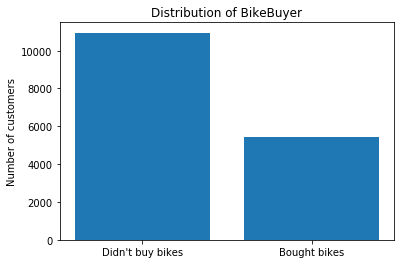

In [22]:
%matplotlib inline
plt.bar(x=["Didn't buy bikes", "Bought bikes"], height=vals)
plt.ylabel("Number of customers")
plt.title("Distribution of BikeBuyer")
plt.show()

It could be informative to rank the median YearlyIncome by Occupation. We will need to group the entries by the *Occupation* Column.

In [23]:
# Group by 'Occupation' on 'YearlyIncome' and sort the values in ascending order
print("Median YearlyIncome by Occupation")
print("---------------------------------")
adv_updated.groupby('Occupation')["YearlyIncome"].median().sort_values()

Median YearlyIncome by Occupation
---------------------------------


Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64

Regarding the the age of customers, which group of customers accounts for the highest AveMonthSpend values? Answering to this question could help us with our marketing campaign, in order to target the right customers. Let's do it!

In [24]:
# Inspect the format of BirthDate Colums
adv_updated['BirthDate'].head()

0    1966-04-08
1    1965-05-14
2    1965-08-12
3    1968-02-15
4    1968-08-08
Name: BirthDate, dtype: object

### Extracting the Year of Birth of the Customers

In [25]:
# We extract the year from the BirthDate Column
adv_updated['Year_of_birth'] = adv_updated['BirthDate'].str.split("-").str[0]
adv_updated['Year_of_birth'].head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1966
1    1965
2    1965
3    1968
4    1968
Name: Year_of_birth, dtype: object

In [26]:
# Convert the 'Year of birth' into a float type
adv_updated['Year_of_birth'] = adv_updated['Year_of_birth'].astype(float)
# Check the type of Year_of_birth column
adv_updated['Year_of_birth'].dtype

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('float64')

These datas were collected in 1998. We will calculate the age of the customers at that period in the Feature Engineering Process.